# __Hospitality__

### Importing required libraries

In [1]:
#Run this only once
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer as Counter
from sklearn.feature_extraction import text as TExT
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

# Hospitality is divided into _five_ subcategories: 

# __4. Waiting Area :__

In [2]:
#Importing dataset
df = pd.read_csv("/Users/harshith/Downloads/Week 3 - New/Hospitality/waiting_area refresh.csv")
df.head()

,text,sentiment
0,looks like the waiting area in first floor at ...,Positive
1,bangalore airport waiting area seat with tras...,Positive
2,i waited 40 minutes at uber zone for cab at b...,Negative
3,blrairport officejmsc india jmscindia dgc...,Positive
4,mediacrooks rajnathsingh jayantsinha naren...,Neutral


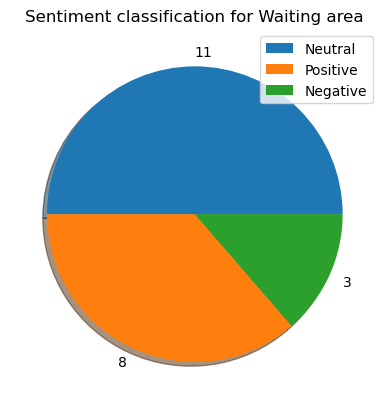

In [3]:
#Counting different sentiments
val = df['sentiment'].value_counts()
sentiments = val.index
waitarea_count = val.values

#Plotting a pie chart
plt.pie(waitarea_count, labels = waitarea_count, shadow= True)
plt.title("Sentiment classification for Waiting area")
plt.legend(labels=sentiments)
plt.show()

## a.Topic modelling and wordcloud for positive tweets regarding waiting area:

### Topic Modelling

In [5]:
##Topic Modelling
#Extracting Positive tweets
positive_reviews = df[df.sentiment == "Positive"]

#Combining reviews into a list
positive_reviews = positive_reviews['text'].tolist()

#Creating custom stop words
custom = []
#Adding custom stopwords to predefined list of stopwords
stop_words = TExT.ENGLISH_STOP_WORDS.union(custom)

#Vectorizing the text data
vector = Counter(max_df=0.95,min_df = 2,stop_words = stop_words)
V = vector.fit_transform(positive_reviews)

#Appyling LDA for Topic modelling
n_topic = 7
LDA = LatentDirichletAllocation(n_components = n_topic,random_state = 42)
LDA.fit(V)

#Extracting top words from each topic
n_words = 10
featured_names = vector.get_feature_names()
topics = []

for topic_idx, topic in enumerate(LDA.components_):
    top_words_idx = topic.argsort()[:-n_words - 1:-1]
    top_words = [featured_names[i] for i in top_words_idx]
    topics.append(top_words)

#Printing the topics obtained
for i,topic in enumerate(topics):
    print(f"Topic {i+1}: {', '.join(topic)}")

Topic 1: air, blrairport, lounge, floor, security, good, seat
Topic 2: seat, air, blrairport, lounge, floor, security, good
Topic 3: air, blrairport, lounge, floor, security, good, seat
Topic 4: floor, air, blrairport, lounge, security, good, seat
Topic 5: blrairport, security, floor, air, lounge, good, seat
Topic 6: lounge, security, air, blrairport, floor, good, seat
Topic 7: good, blrairport, lounge, air, floor, security, seat


### Word Cloud

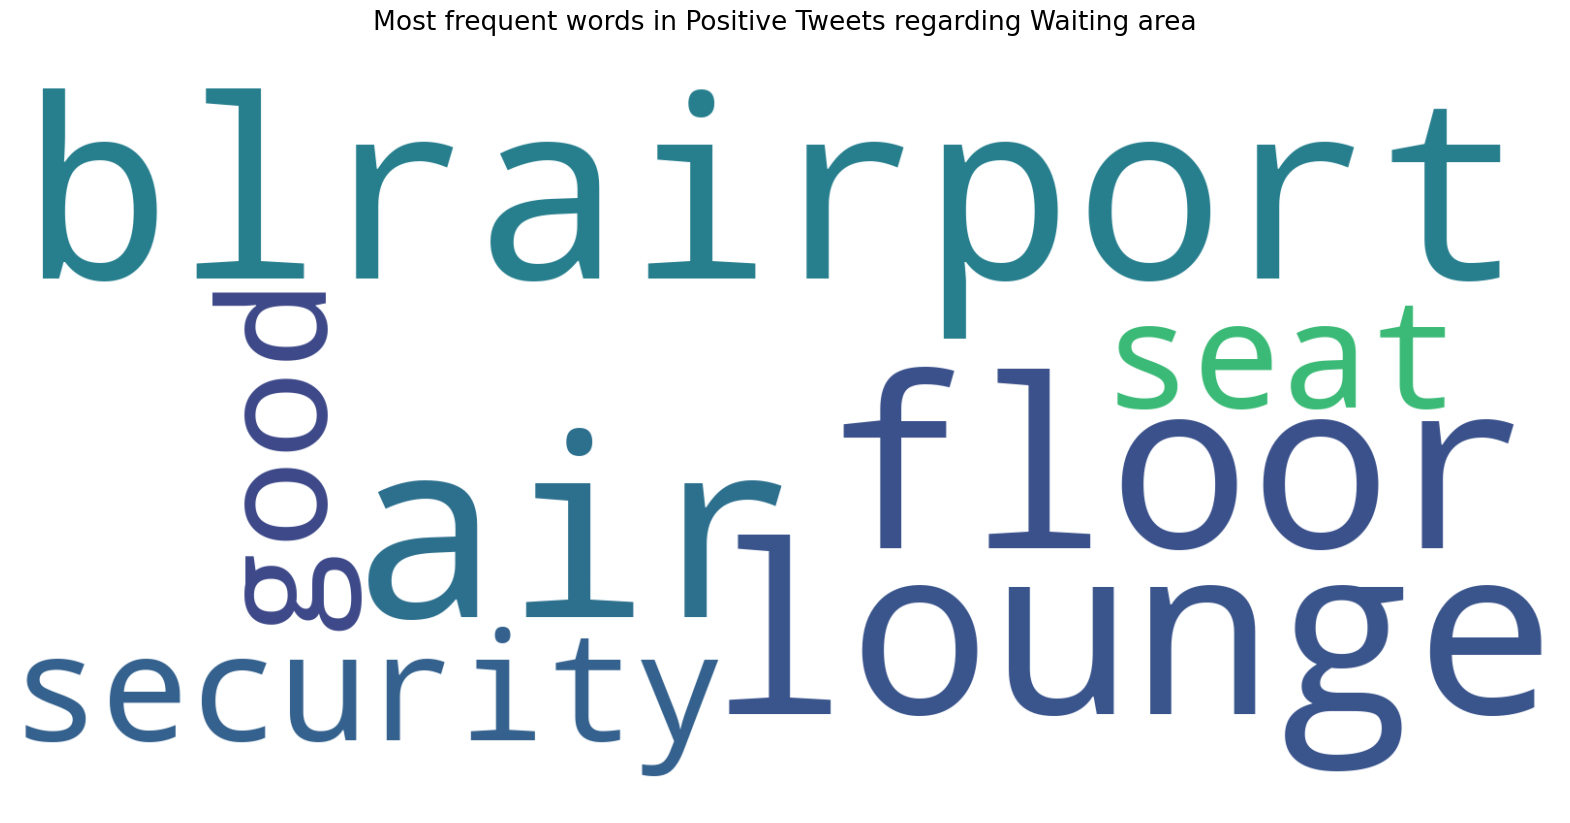

In [6]:
##Worldcloud
res = [' '.join(ele) for ele in topics]
text = ' '.join([word for word in res])
plt.figure(figsize=(20,15))
wordcloud= WordCloud(max_words=500, width=1600, height=800,background_color = 'white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in Positive Tweets regarding Waiting area', fontsize=19)
plt.show()

### Observation 1: Positive notes regarding Waiting Area
#### 1. After the recent upgrades, the witing areas have improved drastically
#### 2. Appreciation of Top class lounges with good security
#### 3. Birds in the airport garden near waiting area are an attraction

## b.Topic modelling and wordcloud for negative tweets regarding Waiting area:

### Topic Modelling

In [7]:
##Topic Modelling
#Extracting Positive tweets
negative_reviews = df[df.sentiment == "Negative"]

#Combining reviews into a list
negative_reviews = negative_reviews['text'].tolist()

#Creating custom stop words
custom = ["11"]
#Adding custom stopwords to predefined list of stopwords
stop = TExT.ENGLISH_STOP_WORDS.union(custom)

#Vectorizing the text data
vector = Counter(max_df=0.95,min_df = 1,stop_words = stop)
V = vector.fit_transform(negative_reviews)

#Appyling LDA for Topic modelling
n_topic = 4
LDA = LatentDirichletAllocation(n_components = n_topic,random_state = 42)
LDA.fit(V)

#Extracting top words from each topic
n_words = 7
featured_names = vector.get_feature_names()
topics = []

for topic_idx, topic in enumerate(LDA.components_):
    top_words_idx = topic.argsort()[:-n_words - 1:-1]
    top_words = [featured_names[i] for i in top_words_idx]
    topics.append(top_words)

#Printing the topics obtained
for i,topic in enumerate(topics):
    print(f"Topic {i+1}: {', '.join(topic)}")

Topic 1: cabs, 20, passengers, 300, absolutely, taxi, atleast
Topic 2: domestic, planned, international, kempegowda, transfer, large, ll
Topic 3: cab, zone, parking, 40, booking, bookings, confirmed
Topic 4: domestic, planned, international, kempegowda, transfer, large, ll


### Word Cloud

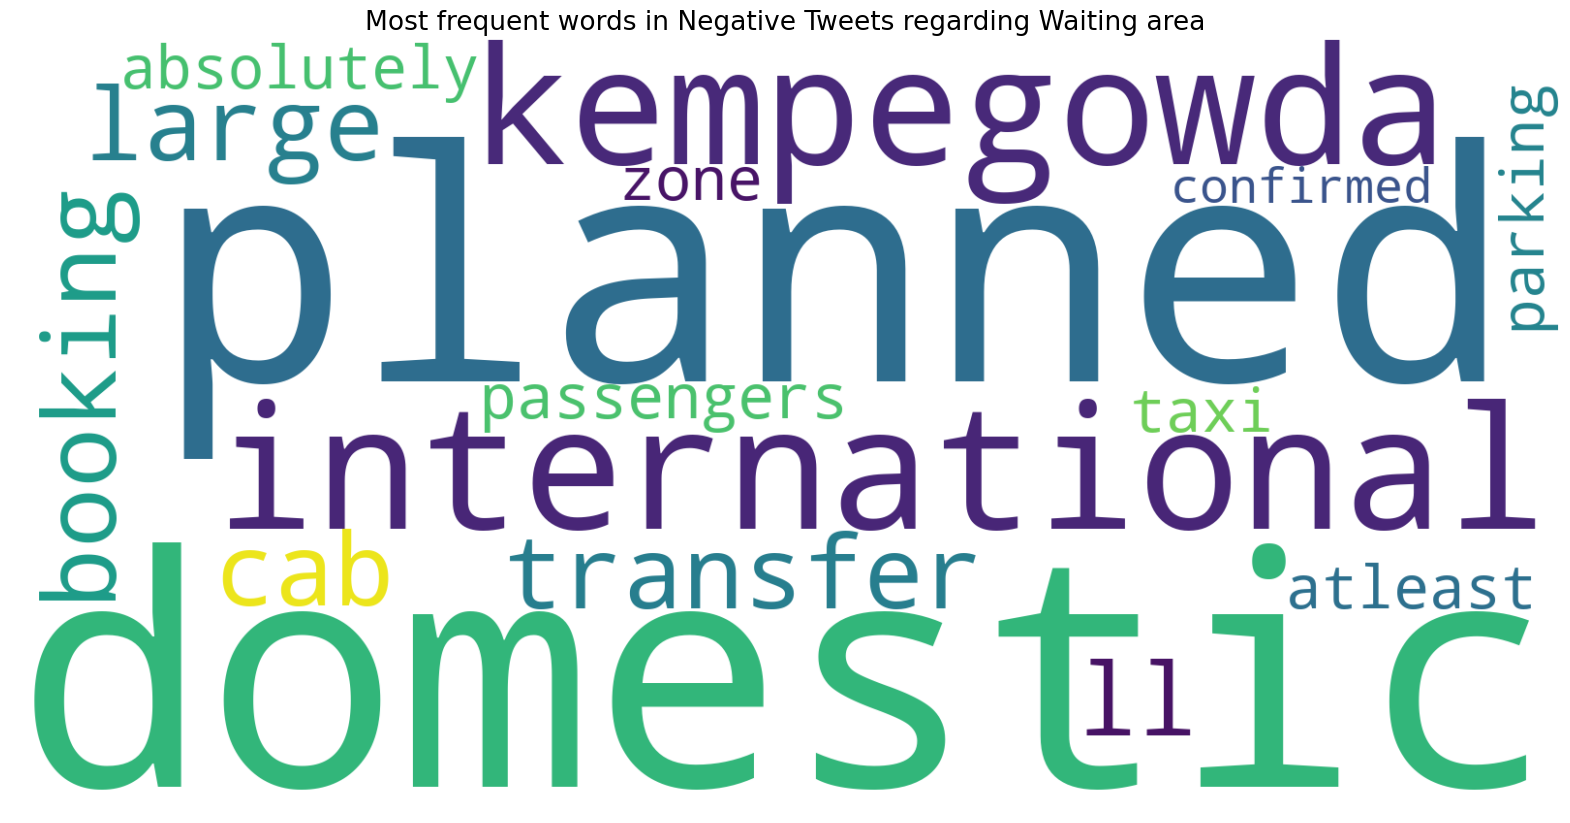

In [8]:
##Worldcloud
res = [' '.join(ele) for ele in topics]
text = ' '.join([word for word in res])
plt.figure(figsize=(20,15))
wordcloud= WordCloud(max_words=500, width=1600, height=800,background_color = 'white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in Negative Tweets regarding Waiting area', fontsize=19)
plt.show()

### Observation 2: Negative notes regarding Waiting area
#### 1. People have to wait for a long time for taxis even though there are ample amount of taxis in the parking lots due to the large size and chaos of the airport
#### 2. There are no medical stores in the nearby vicinity which has raised problems for many travellers
#### 3. Accessibility is an issue for many travellers